# Abalone

In [3]:
# Data frames.
import pandas as pd

# Lists
import numpy as np

# Plots
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

# Machine Learning.
import sklearn as sk
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV

## ML&S - Autumn Tasks

### 2. Reading Data from CSV

In [4]:
# Reading and saving data from abalone.csv as a pandas database
abaloneData = pd.read_csv("data/abalone.csv")

# Checking shape
abaloneShape = abaloneData.shape
print("abaloneData has {} rows and {} columns".format(abaloneShape[0], abaloneShape[1]))

# A look at the data
abaloneData.head()

abaloneData has 4177 rows and 9 columns


,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### 3. Classifications and Measurement Scales

#### Attribute information 
Taken from data source, UC Irvine Machine Learning Repository. Ref: https://archive.ics.uci.edu/dataset/1/abalone

| Name           | Data Type | Measurement| Description                       |
| -------------- | ----------| ---------- | --------------------------------- |
| Sex            | nominal   | M, F, and I| (infant)                          |
| Length         | continuous| mm         | Longest shell measurement         |
| Diameter       | continuous| mm         | perpendicular to length           |
| Height         | continuous| mm         | with meat in shell                |
| Whole weight   | continuous| grams      | whole abalone                     |
| Shucked weight | continuous| grams      | weight of meat                    |
| Viscera weight | continuous| grams      | gut weight (after bleeding)       |
| Shell weight   | continuous| grams      | after being dried                 |
| Rings          | integer   |            | +1.5 gives the age in years       |

#### Categorical Data
* **Nominal Data**  
In the above table, Sex has been identified as a Nominal Data Type. Nominal data has mutually exclusive categories and the values do not have any specific order. For an Abalone, these categories have been identified as: (M for Male, F for Female and I for Infant.).
Ref: https://en.wikipedia.org/wiki/Nominal_category

* **Ordinal Data**  
Ordinal data, is when the data has defined categories such as in Nominal Data, but ordinal data does have have an order to these categories. An exampe might be a dial with "Low", "Medium" and "High" settings on a toaster, we do not inherently know that these settings are equally spaced on some relevant scale, but we can inherently interpret their order.
Ref: https://en.wikipedia.org/wiki/Ordinal_data

* **Discrete Data**  
Discrete data is a categorical Data Type, it has categories and order like the ordinal data, but additionally we know the interval between these values. An example here could be the number of wins in a season a team achieved. There is an upper and lower limit to this data with higher values being better, and a win is a discrete event as the interval.

#### Numerical Data
* **Continuous Data**  
In the above table, length measurements and weight measurements have been identified as Continuous Data. Data is continuous when it can take any value. For a growing Abalone, their lenght and weight meaurements are slowly but steadily increasing and changing as it grows.

* **Integer Data**  
In the above table, the ring count has been identified as an interger. Intergers can only be positive or negative whole numbers, or nothing as in 0. In this case the count of rings on an Abalone, it can not have half rings.

In [5]:
# Checking Python data types on the loaded database
abaloneData.dtypes

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object

#### Python Data Types
* **objects**  
In the above table, sex has been identified as an object. Objects can be numerical values such as intergers or floating point numbers, or strings and even lists. In this case the dataframe type has also been identified as a object as it contains a list of values of different types.

* **float64 Data**  
In the above table, lenght measurements and weight measurements have been identified as floating point numbers. This is beacuse the values are numerical values only, which contain decimal places as the data is continuious.

* **int64 Data**  
In the above table, ring count has been identified as an integer. This saves memory as the ring counts can only be integers as discussed above.

* **Boolean**  
Data can also be set as a Boolean value in python. This means the data only has two states it can take, often 0 or 1, or True or False. Saving this data as a Boolean can use less memory .

#### Units
* **Millimeters**  
A metric unit of length equal to one thousandth of a metre.

* **Grams**  
A metric unit of mass equal to one thousandth of a kilogram.

In [6]:
# Putting this attribute information into a callable database for the plots below
attributeInformation = {
    # Nicely formatted column names
    "Name": [
        "Sex", "Length", "Diameter", "Height", "Whole weight", 
        "Shucked weight", "Viscera weight", "Shell weight", "Rings"
    ],
    "Data Type": [
        "nominal", "continuous", "continuous", "continuous", "continuous", 
        "continuous", "continuous", "continuous", "integer"
    ],
    "Meas.": [
        ["M", "F", "I"], "mm", "mm", "mm", "grams", 
        "grams", "grams", "grams", "total count"
    ],
    "Description": [
        "(infant)", "Longest shell measurement", "perpendicular to length", 
        "with meat in shell", "whole abalone", "weight of meat", 
        "gut weight (after bleeding)", "after being dried", "+1.5 gives the age in years"
    ]
}

### 4. Exploring data

#### Checking if this data has any NaN values
This is being done using the dropna() function, to dropping any rows which contain a NaN value. Then to check how many rows have been dropped, the new dataframe shape is compared to the origional dataframe shape from above.

In [7]:
# Cleaning Data of NaN values
abaloneData.dropna()

# Getting change in data shape, old - new
deltaRows = int(abaloneShape[0])-int(abaloneData.shape[0])
deltaColumns = int(abaloneShape[1])-int(abaloneData.shape[1])

# Checking shape post cleaning
print("abaloneData has lost {} rows and {} columns".format((deltaRows),
        (deltaColumns)))

abaloneData has lost 0 rows and 0 columns


The data has not lost any rows or columns, meaning all cells are populated with data

#### Looking at the data values and spread

In [9]:
# information of the data
abaloneData.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Plotting data

In [36]:
def plotHistDensity(data, attributeInformation):
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting a list of variable names for titles
    abaloneColsNames = attributeInformation['Name']
    
    # Making the plot large
    plt.figure(figsize=(15, 15))

    num_cols = len(abaloneCols)
    for i in range(1, num_cols):
        plt.subplot(3, 3, i)

        # Plot the density histogram
        plt.hist(data[abaloneCols[i]], bins=30, density=True, color='dodgerblue', edgecolor='black')

        # Calculate mean and standard deviation
        mean_value = data[abaloneCols[i]].mean()
        
        # Plot the mean line
        plt.axvline(mean_value, color='red', linewidth=1.5, label=f'Mean: {mean_value:.2f}')
        
        # Adding a title and labels
        plt.title(abaloneColsNames[i], size=15, color='black')
        plt.xlabel(f"{abaloneColsNames[i]} Density", size=12, color='black')
        plt.ylabel('Density', size=12, color='black')
        plt.legend(loc='upper right')
        plt.grid(True)

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()


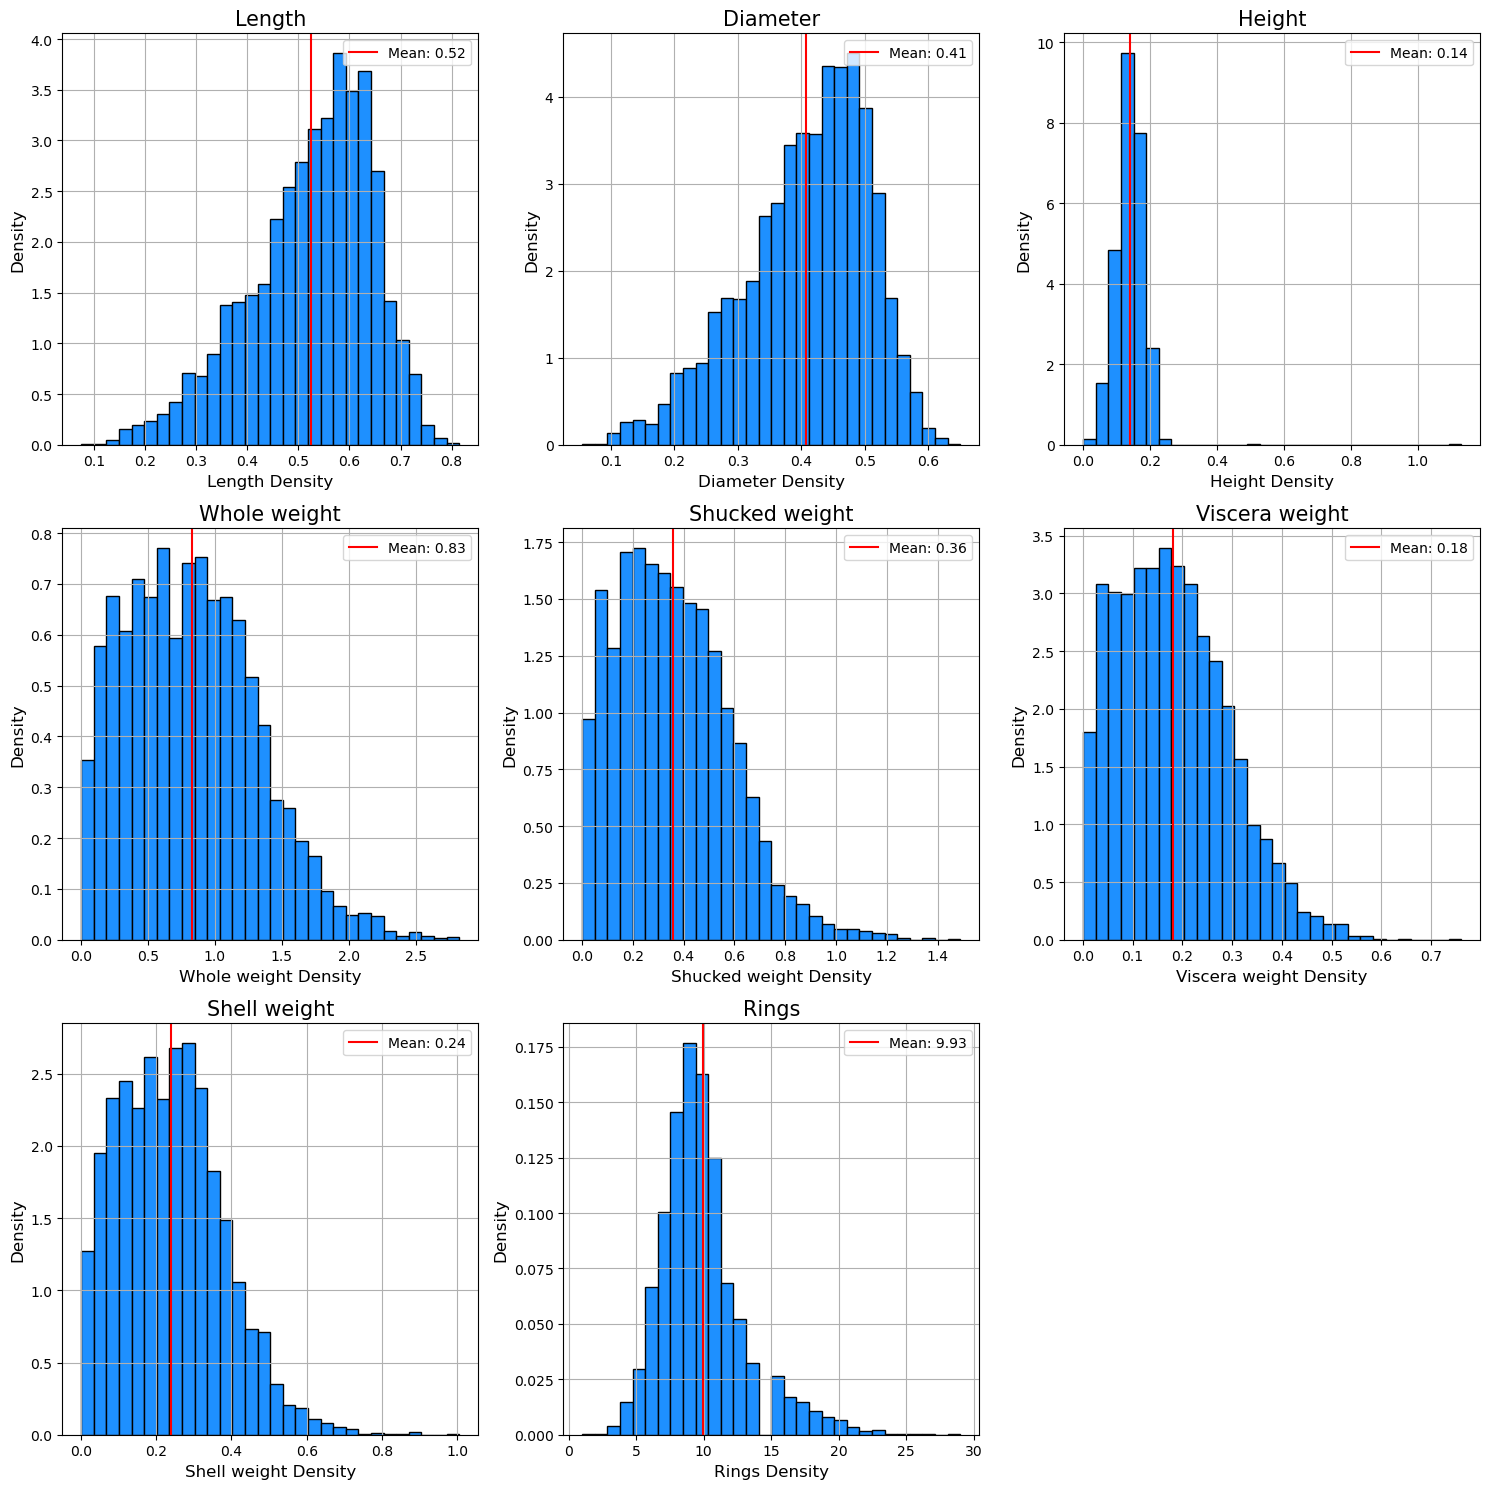

In [37]:
plotHistDensity(abaloneData, attributeInformation)

In [38]:
def plotSexColour(data, attributeInformation):
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting a list of variable names for titles
    abaloneColsNames = attributeInformation['Name']
    # Getting the units of the variables
    unit = attributeInformation['Meas.']
    sex = data['sex'].unique()

    # Color mapping
    color_map = {'M': 'dodgerblue', 'F': 'deeppink', 'I': 'limegreen'}

    # Making the plot large, as there is good quality given the large sample size
    plt.figure(figsize=(15, 15))

    for i in range(1, 8):
        plt.subplot(3, 3, i)
    
        x = data['rings'] + 1.5  # Assuming age = rings + 1.5
        y = data[abaloneCols[i]]

        # Plot each sex
        for sex_val in sex:
            indx = data['sex'] == sex_val
            plt.scatter(x[indx], y[indx], s=100, color=color_map.get(sex_val, 'grey'), label=sex_val, alpha=0.5)

        # Adding a title and label and gridlines as part of the function
        plt.title(str(abaloneColsNames[i]), size=15, color='black')
        plt.xlabel('Age')
        plt.ylabel(f"{abaloneColsNames[i]} Scaled", size=12, color='black')
        plt.legend(loc='upper left')
        plt.grid(True)

        # Adding a tick at 0 on the x-axis
        x_min, x_max = plt.xlim()
        if x_min > 0:
            x_min = 0
        plt.xlim(x_min, x_max)
        x_ticks = plt.xticks()[0]
        if 0 not in x_ticks:
            plt.xticks(list(x_ticks) + [0])

        # Adding a tick at 0 on the y-axis
        y_min, y_max = plt.ylim()
        if y_min > 0:
            y_min = 0
        plt.ylim(y_min, y_max)
        y_ticks = plt.yticks()[0]
        if 0 not in y_ticks:
            plt.yticks(list(y_ticks) + [0])

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()

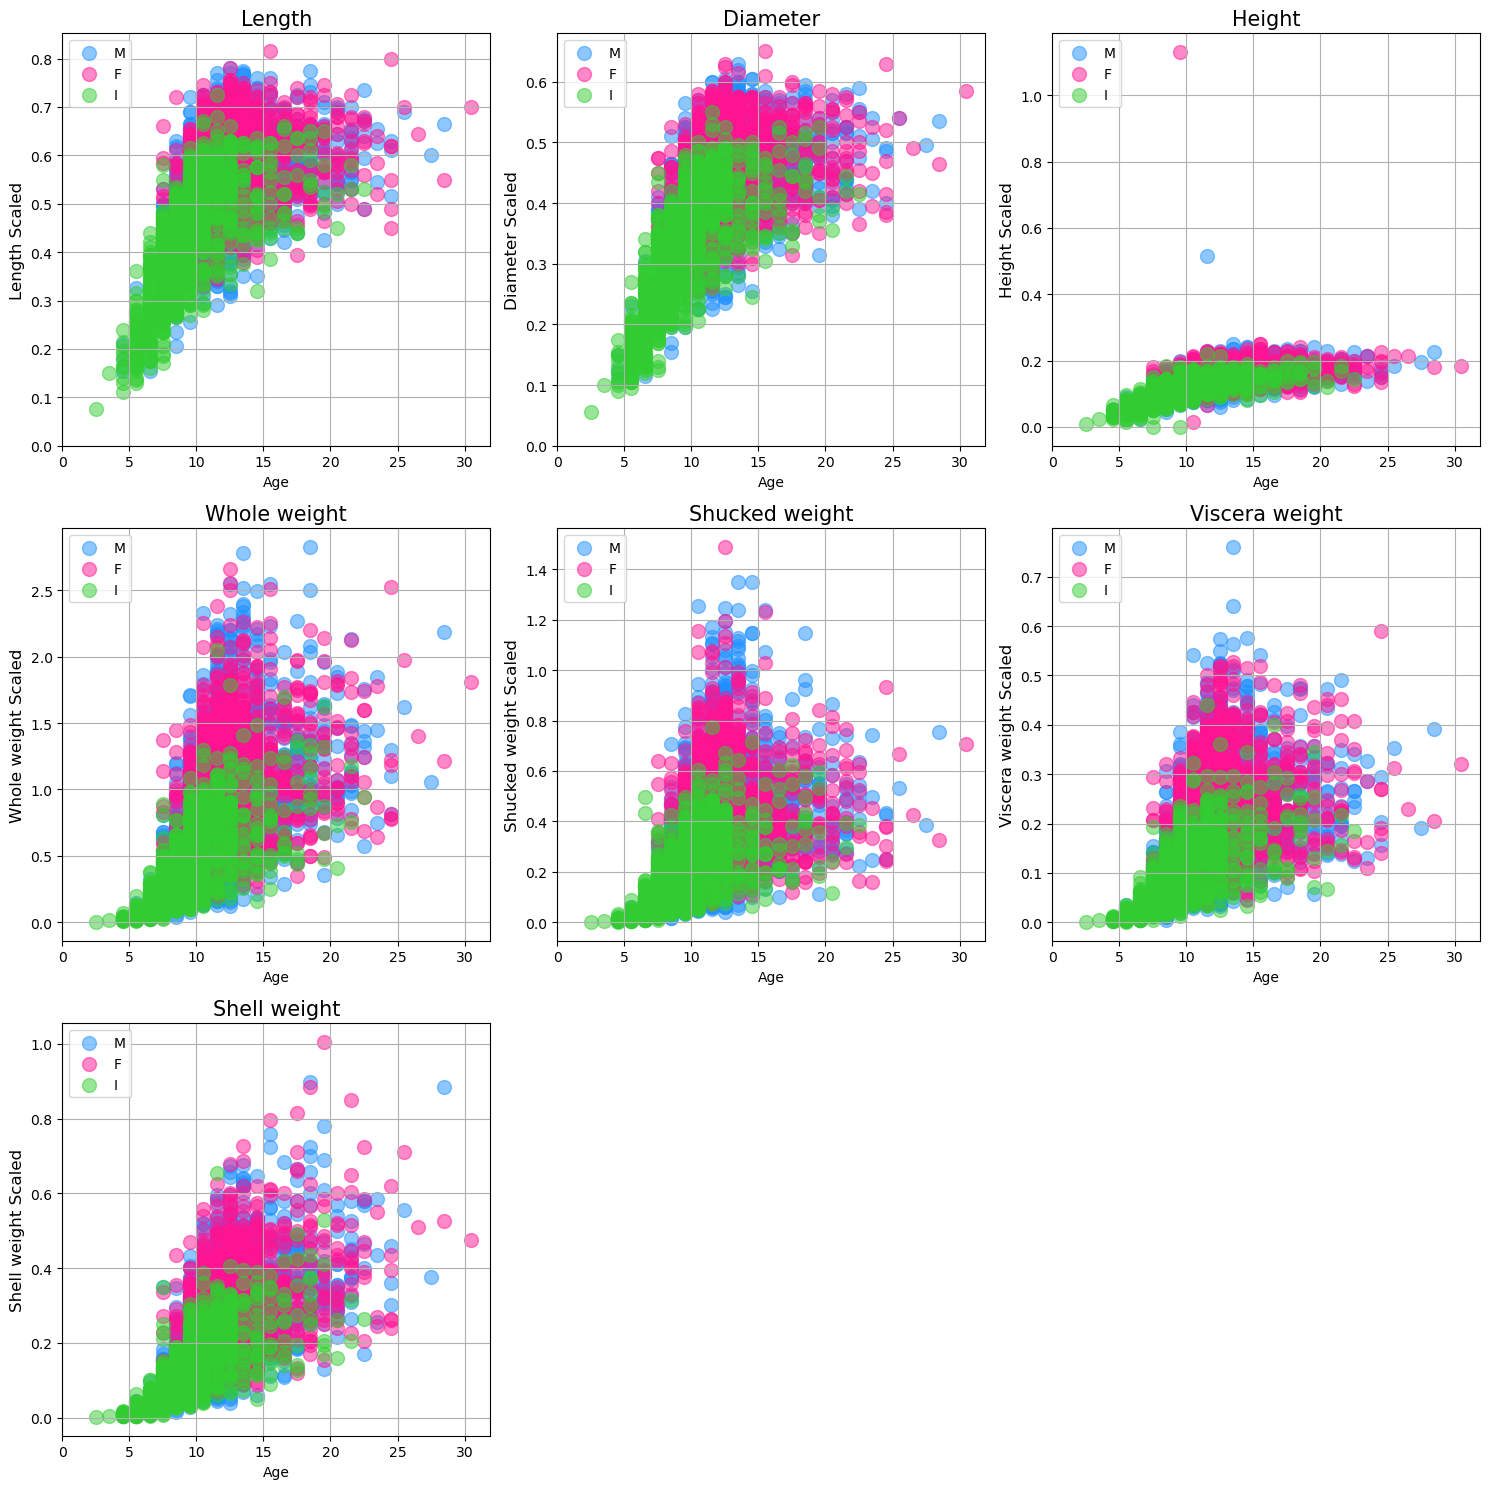

In [39]:
plotSexColour(abaloneData, attributeInformation)

### Errorbar subsampling

In [40]:
def plotAverageBySexWithErrorBars(data, attributeInformation):
    # Getting a list of variable names being plotted
    abaloneCols = data.columns
    # Getting a list of variable names for titles
    abaloneColsNames = attributeInformation['Name']
    # Getting the units of the variables
    sex = data['sex'].unique()

    # Color mapping
    color_map = {'M': 'dodgerblue', 'F': 'deeppink', 'I': 'limegreen'}

    # Making the plot large
    plt.figure(figsize=(15, 15))

    for i in range(1, 8):
        plt.subplot(3, 3, i)
    
        # Isolating variable to be plotted
        y_var = abaloneCols[i]

        # Calculate the mean and standard error for each sex at each age
        stats_data = data.groupby(['rings', 'sex'])[y_var].agg(['mean', 'std', 'count']).reset_index()
        stats_data['sem'] = stats_data['std'] / np.sqrt(stats_data['count'])  # Standard Error

        # Plot the means with error bars
        for sex_val in sex:
            sex_data = stats_data[stats_data['sex'] == sex_val]
            plt.errorbar(sex_data['rings'] + 1.5, sex_data['mean'], yerr=sex_data['sem'], 
                         marker='o', linestyle='none', color=color_map.get(sex_val, 'grey'), label=sex_val, alpha = 0.75)

        # Adding a title and labels
        plt.title(f"Mean {abaloneColsNames[i]}", size=15, color='black')
        plt.xlabel('Age')
        plt.ylabel(f"{abaloneColsNames[i]} Scaled", size=12, color='black')
        plt.legend(loc='upper left')
        plt.grid(True)

        # Adding a tick at 0 on the x-axis
        x_min, x_max = plt.xlim()
        if x_min > 0:
            x_min = 0
        plt.xlim(x_min, x_max)
        x_ticks = plt.xticks()[0]
        if 0 not in x_ticks:
            plt.xticks(list(x_ticks) + [0])

        # Adding a tick at 0 on the y-axis
        y_min, y_max = plt.ylim()
        if y_min > 0:
            y_min = 0
        plt.ylim(y_min, y_max)
        y_ticks = plt.yticks()[0]
        if 0 not in y_ticks:
            plt.yticks(list(y_ticks) + [0])

    # Adjusting layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()


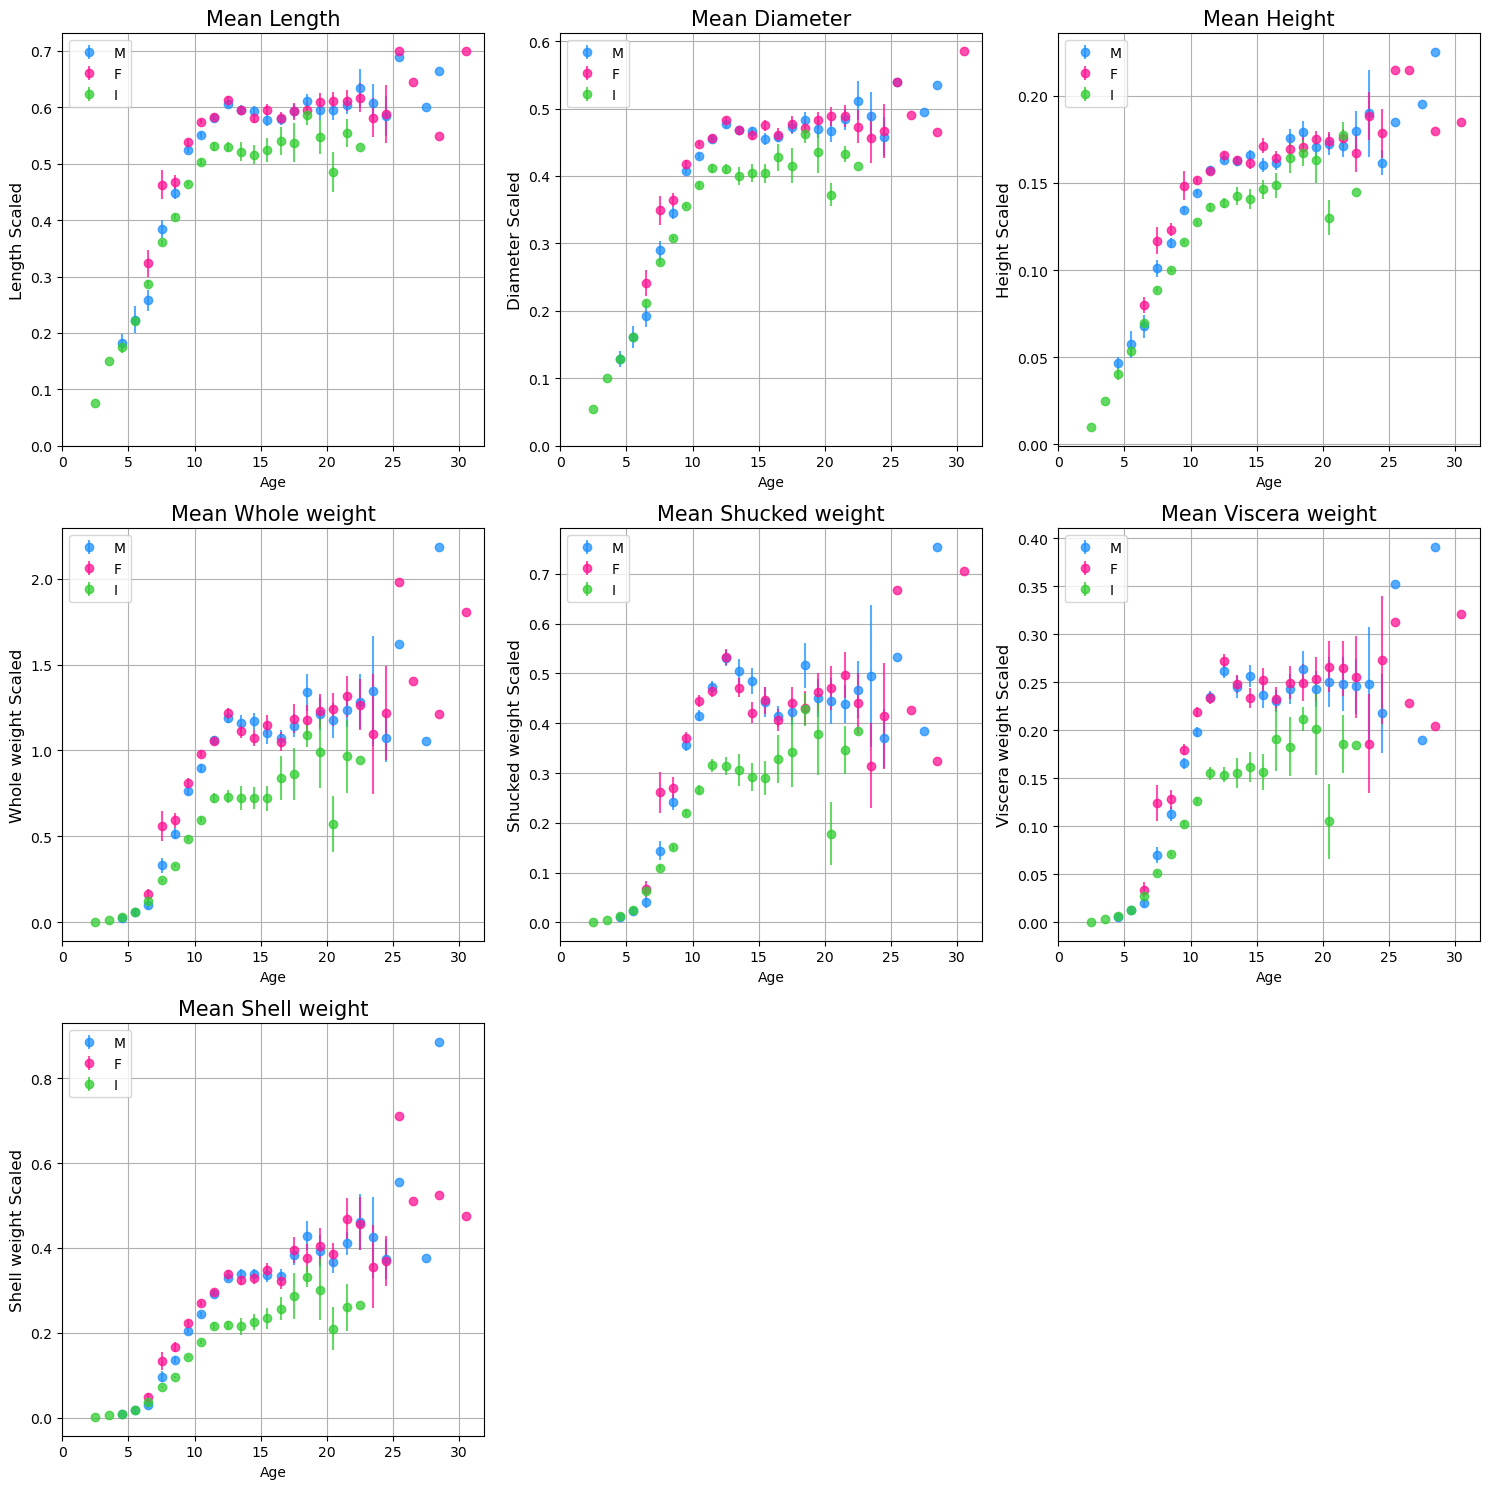

In [41]:
plotAverageBySexWithErrorBars(abaloneData, attributeInformation)

c:\Users\David\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


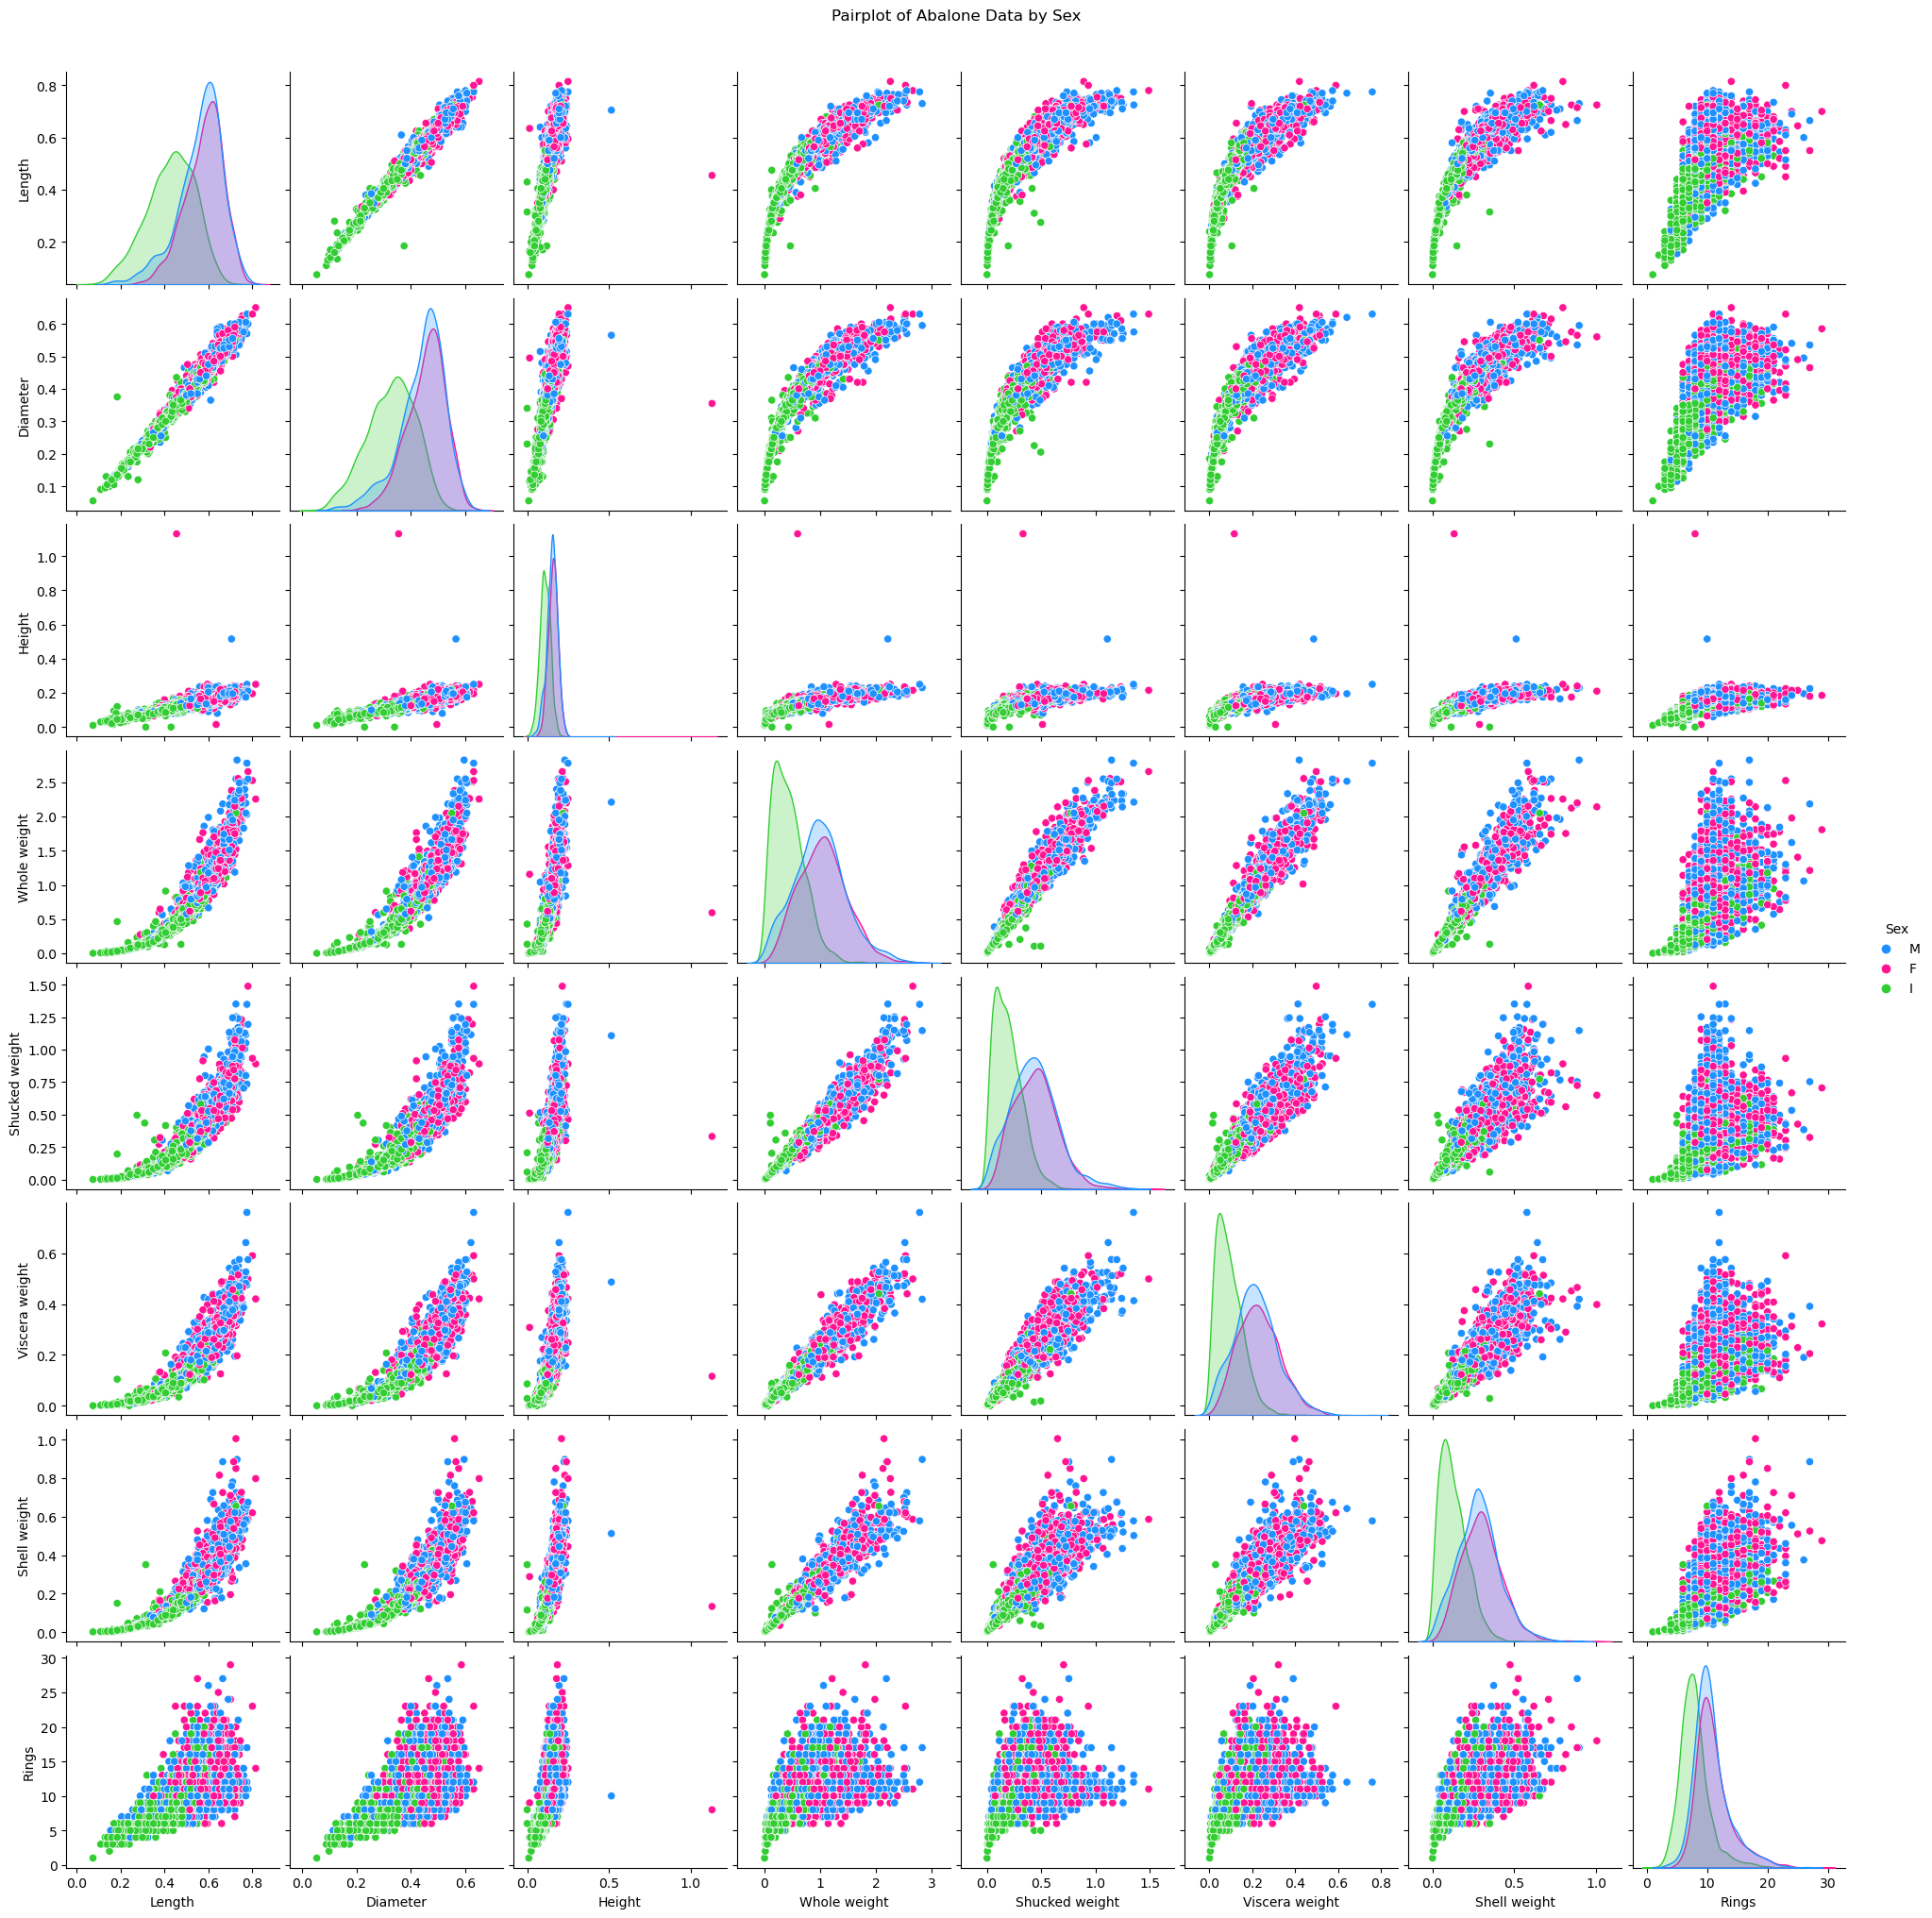

In [42]:
color_map = {'M': 'dodgerblue', 'F': 'deeppink', 'I': 'limegreen'}
palette = sns.color_palette([color_map['M'], color_map['F'], color_map['I']])

# Create the pairplot
pairplot = sns.pairplot(abaloneData, hue='sex', palette=palette)

# Rename axis labels using the attribute information
axis_labels = attributeInformation['Name']
units = attributeInformation['Meas.']
num_vars = len(axis_labels)
    
for i in range(num_vars - 1):  # Off by one because `attributeInformation` may include the 'sex' column
    for j in range(num_vars - 1):
        if i != j:  # Scatter plots
            pairplot.axes[i, j].set_xlabel(axis_labels[j + 1])
            pairplot.axes[i, j].set_ylabel(axis_labels[i + 1])
        else:  # Diagonal plots
            pairplot.axes[i, j].set_xlabel(axis_labels[j + 1])
            pairplot.axes[i, j].set_ylabel(axis_labels[j + 1])


# Adjust plot titles and layout
pairplot.fig.suptitle('Pairplot of Abalone Data by Sex', y=1.02)
pairplot._legend.set_title('Sex')
plt.show()

### Checking Correlation

In [43]:
# Changing the sex column to a floating point 0, 0.5 or 1
# 1 = MFemale 
# 0 = Male
# 0.5 = Infant
abaloneDataCorr['sex'] = abaloneData['sex'].map({'F' : 1, 'M' : 0, 'I' : 0.5})
abaloneDataCorr.head(5)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,0.0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,1.0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.5,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


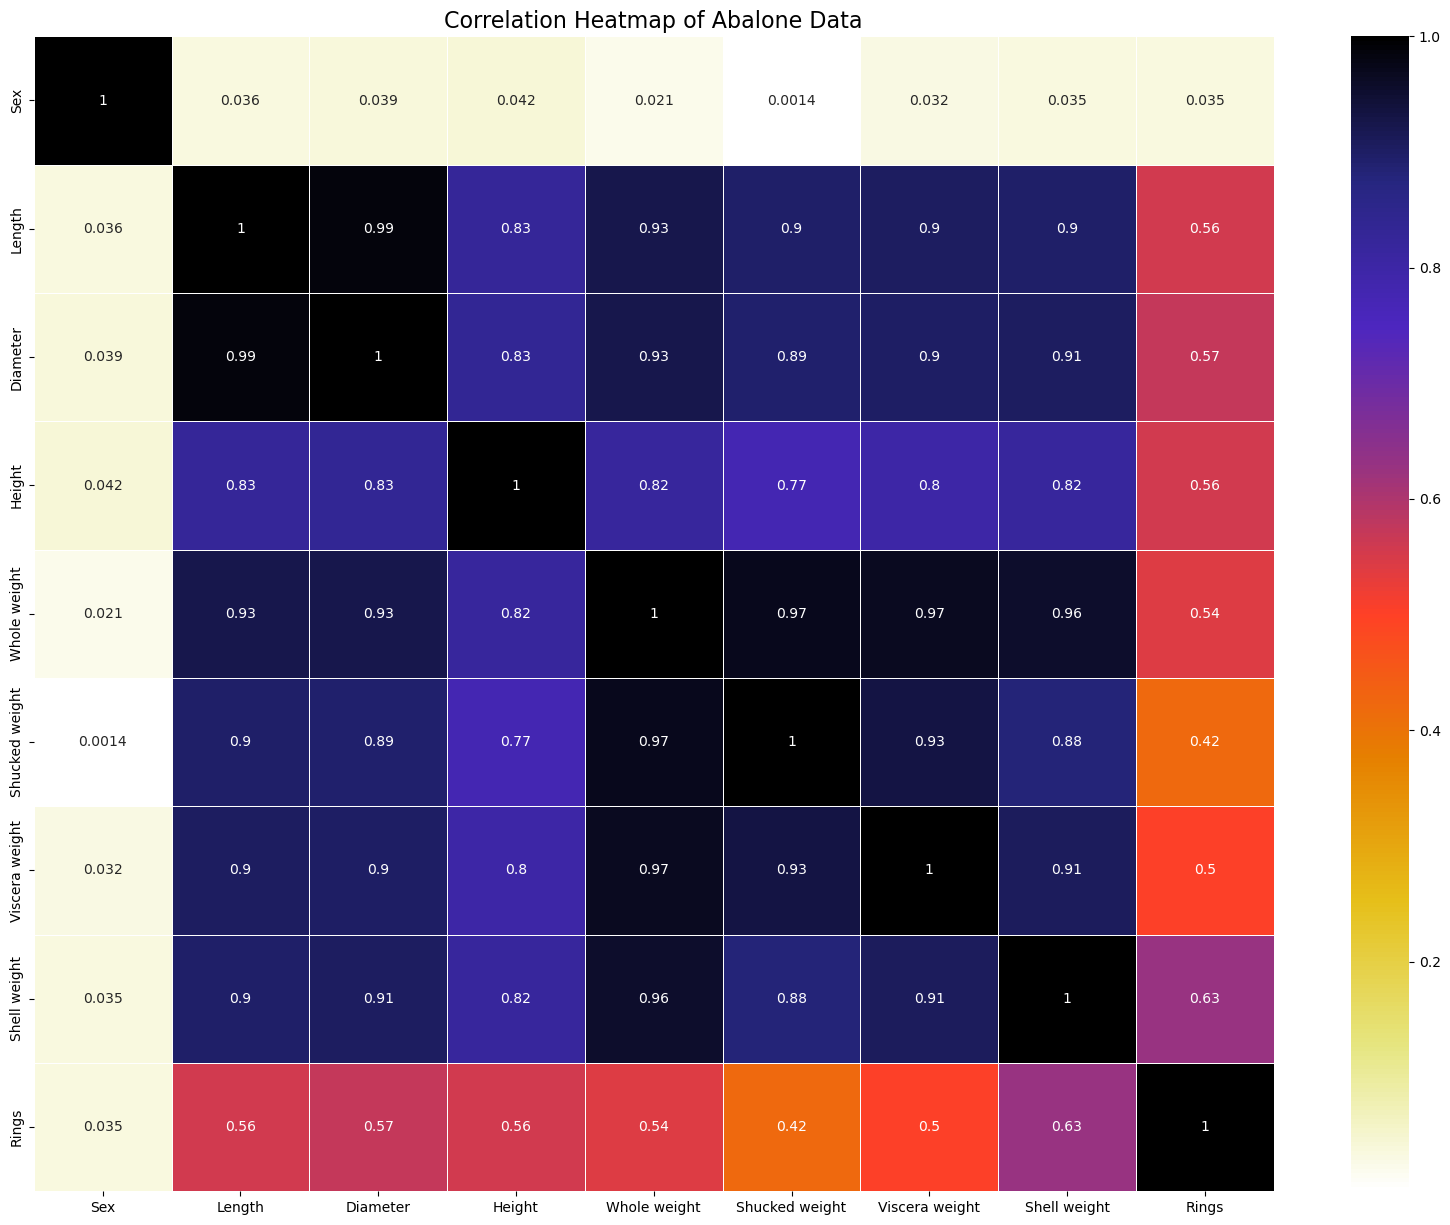

In [44]:
# Compute correlation matrix
cor = abaloneDataCorr.corr()

# Prepare labels from attributeInformation (excluding 'Sex')
labels = attributeInformation['Name']

# Plot the heatmap with labels
plt.figure(figsize=(20, 15))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r, linewidths=.5, xticklabels=labels, yticklabels=labels)
plt.title('Correlation Heatmap of Abalone Data', size=16)
plt.show()

#### Checking the effect on sex in the correlation

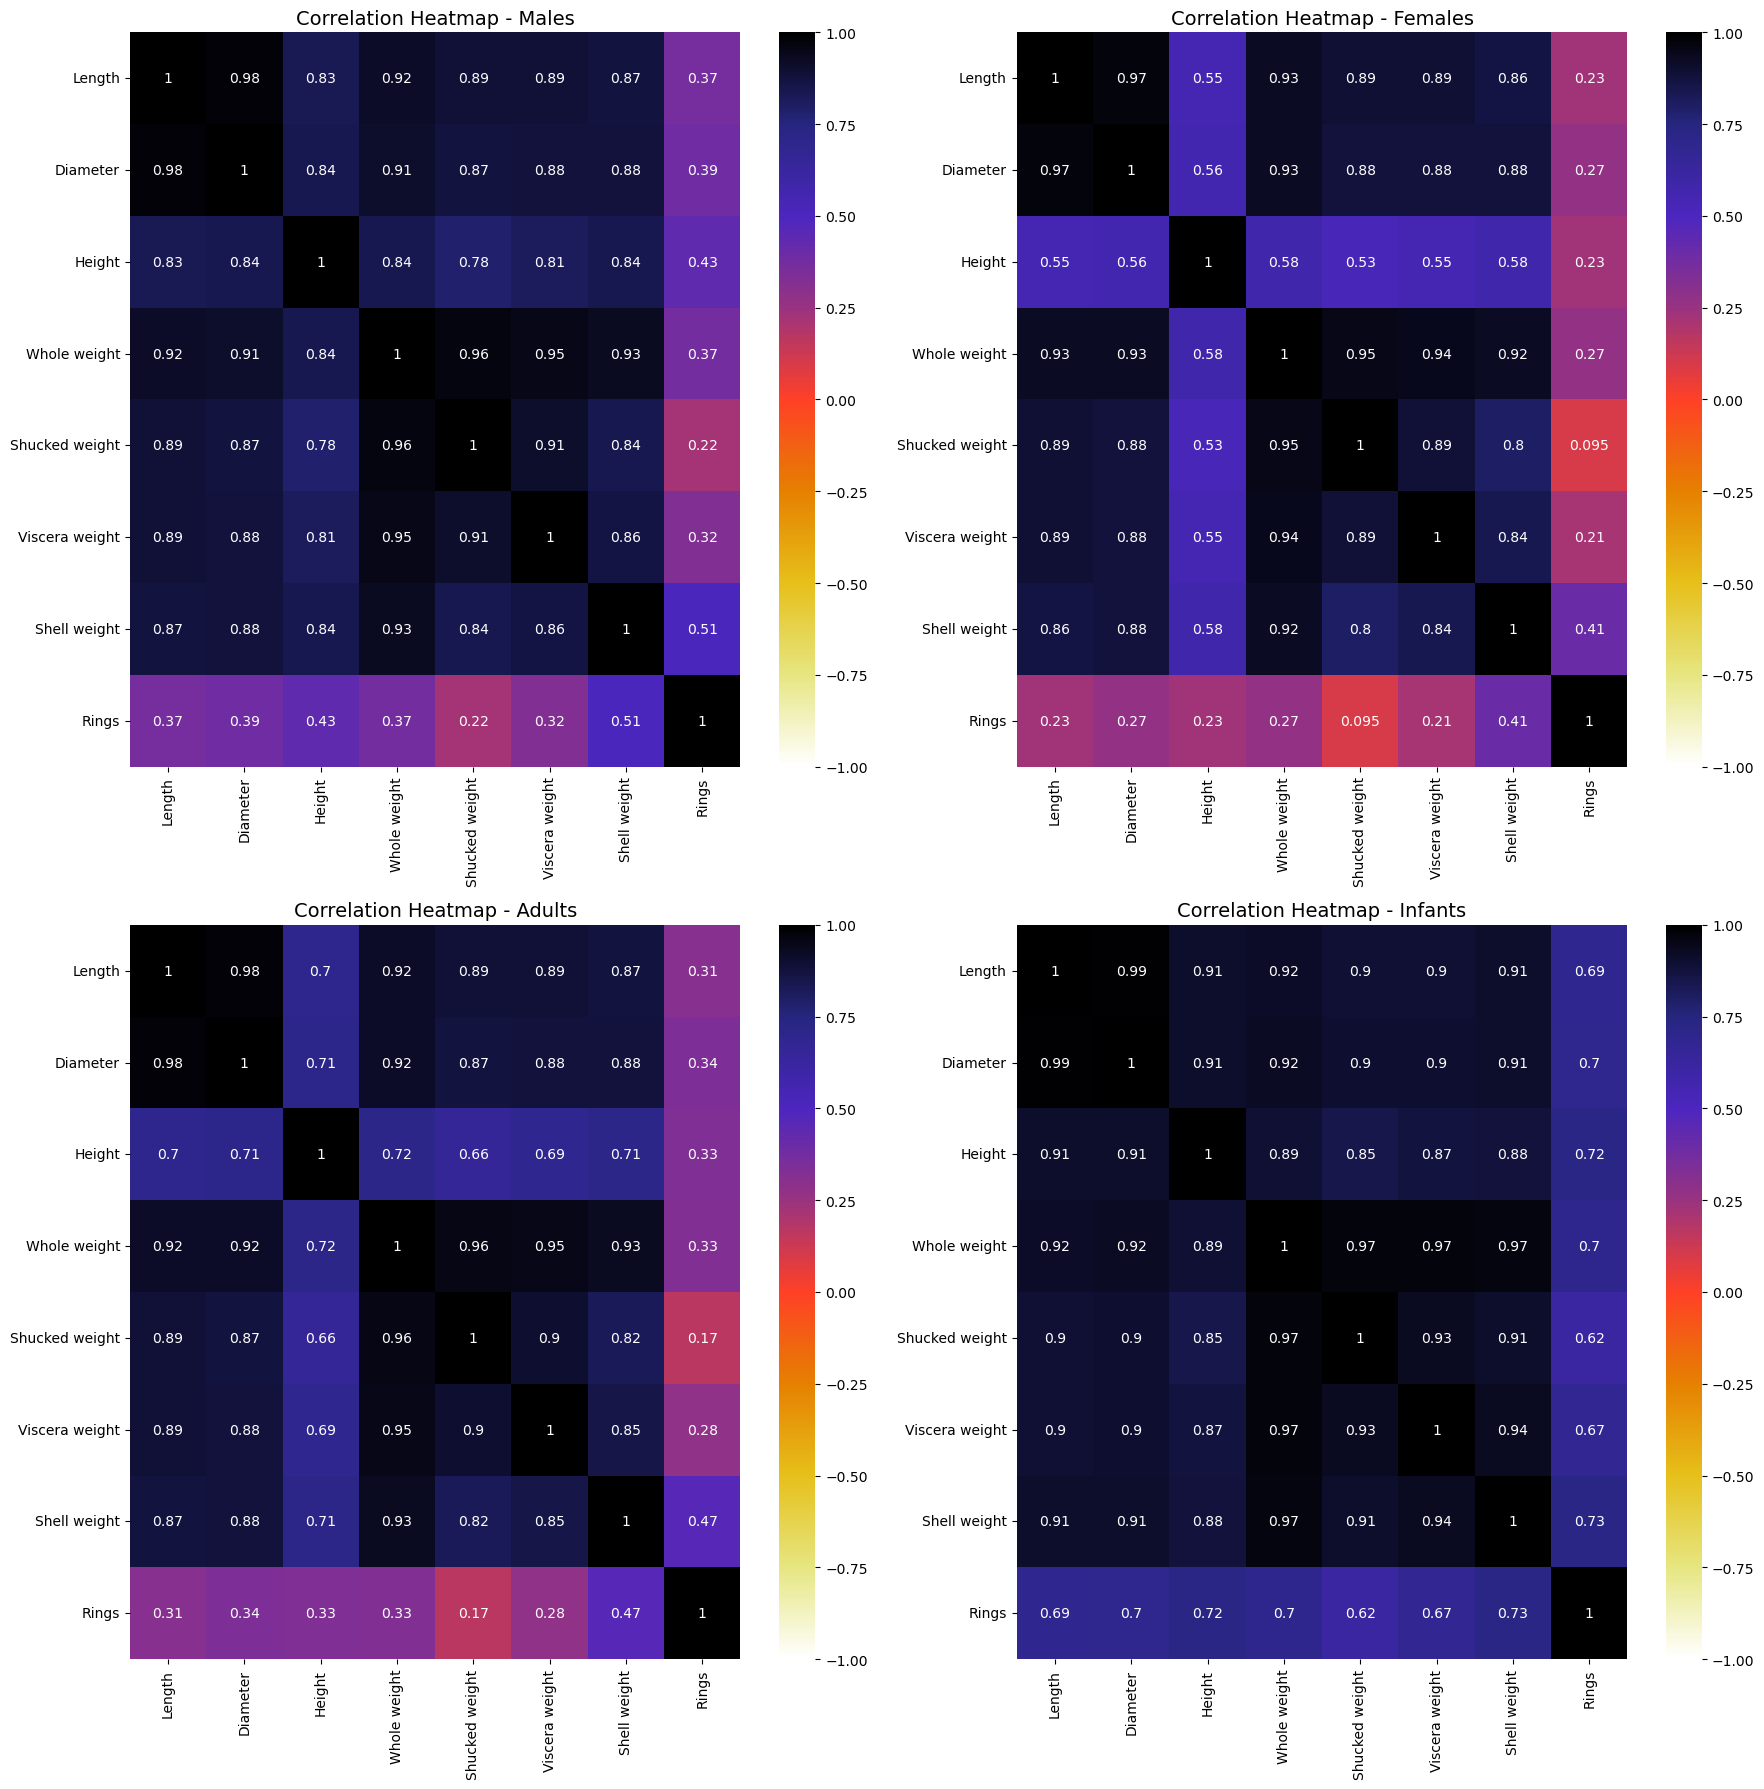

In [45]:
# Define a function to compute correlation matrix for a subset
def correlationMatrix(data):
    return data.corr()

# Define a function to plot heatmap in a grid layout
def heatmapGrid(ax, matrix, title, labels):
    sns.heatmap(matrix, annot=True, cmap=plt.cm.CMRmap_r, xticklabels=labels, yticklabels=labels, cbar=True, vmin=-1, vmax=1, ax=ax)
    ax.set_title(title, size=14)

# Filter data for Males, Females, Adults, and Infants
dataPopulation = abaloneData.drop(columns=['sex'])
dataMale = abaloneData[abaloneData['sex'] == 'M'].drop(columns=['sex'])
dataFemale = abaloneData[abaloneData['sex'] == 'F'].drop(columns=['sex'])
dataAdult = abaloneData[abaloneData['sex'] != 'I'].drop(columns=['sex'])
dataInfant = abaloneData[abaloneData['sex'] == 'I'].drop(columns=['sex'])

# Compute correlation matrices
correlationPopulation = correlationMatrix(dataPopulation)
correlationMale = correlationMatrix(dataMale)
correlationFemale = correlationMatrix(dataFemale)
correlationAdult = correlationMatrix(dataAdult)
correlationInfant = correlationMatrix(dataInfant)

# Generate labels without units
labels = attributeInformation['Name'][1:]  # Exclude 'Sex' and start from 'Age'

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(18, 18))

# Plot the original heatmaps
heatmapGrid(axes[0, 0], correlationMale, 'Correlation Heatmap - Males', labels)
heatmapGrid(axes[0, 1], correlationFemale, 'Correlation Heatmap - Females', labels)
heatmapGrid(axes[1, 0], correlationAdult, 'Correlation Heatmap - Adults', labels)
heatmapGrid(axes[1, 1], correlationInfant, 'Correlation Heatmap - Infants', labels)

# Adjust layout
plt.tight_layout()
plt.show()

## Training a Model


Splitting Data

In [57]:
# The X values.
X = abaloneDataCorr[['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']]

# y values.
y = abaloneDataCorr['rings']

# Splitting the data into a training set and a test set
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y, test_size=0.3, random_state=0)

# Checking shape of the training and test features
X_train.shape, y_train.shape

((2923, 8), (2923,))

In [49]:
# setting up a grid search to tune an MLP Classifier Ref: 14
# model = MLPClassifier(random_state=0)

#set up patameters Ref: https://www.kaggle.com/code/zwan7415/machine-leanring-project-abalone-study
# parameters = {  'max_iter' : [100, 200, 300, 400],
#                'hidden_layer_sizes':[(3,),(5,),(10,),(15,),(20,),(25,)],
#                'activation':['tanh','relu','logistic','softplus','softmax'],
#                'solver':['sgd'],
#                'alpha':[0.05,0.1,1,10],
#                'learning_rate':['Constant','adaptive',0.01,0.1],
#            }

In [50]:
# Perfroming grid search using the above lists
#best_model = GridSearchCV(model, parameters)

In [51]:
# Fitting models using this grid search
#best_model.fit(X_train, y_train)

# Selecting the best parameters from the gridsearch
#best_model.best_params_

c:\Users\David\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\David\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\David\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\David\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\David\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWa

{'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (15,),
 'learning_rate': 'adaptive',
 'max_iter': 400,
 'solver': 'sgd'}

Output was {'activation': 'relu',
 'alpha': 0.05,
 'hidden_layer_sizes': (15,),
 'learning_rate': 'adaptive',
 'max_iter': 400,
 'solver': 'sgd'}

In [55]:
# Train the MLPClassifier
mlp = MLPClassifier(activation='relu', alpha= 0.05, hidden_layer_sizes= (15,), learning_rate='adaptive', max_iter= 400, solver= 'sgd', random_state=0)
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

c:\Users\David\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


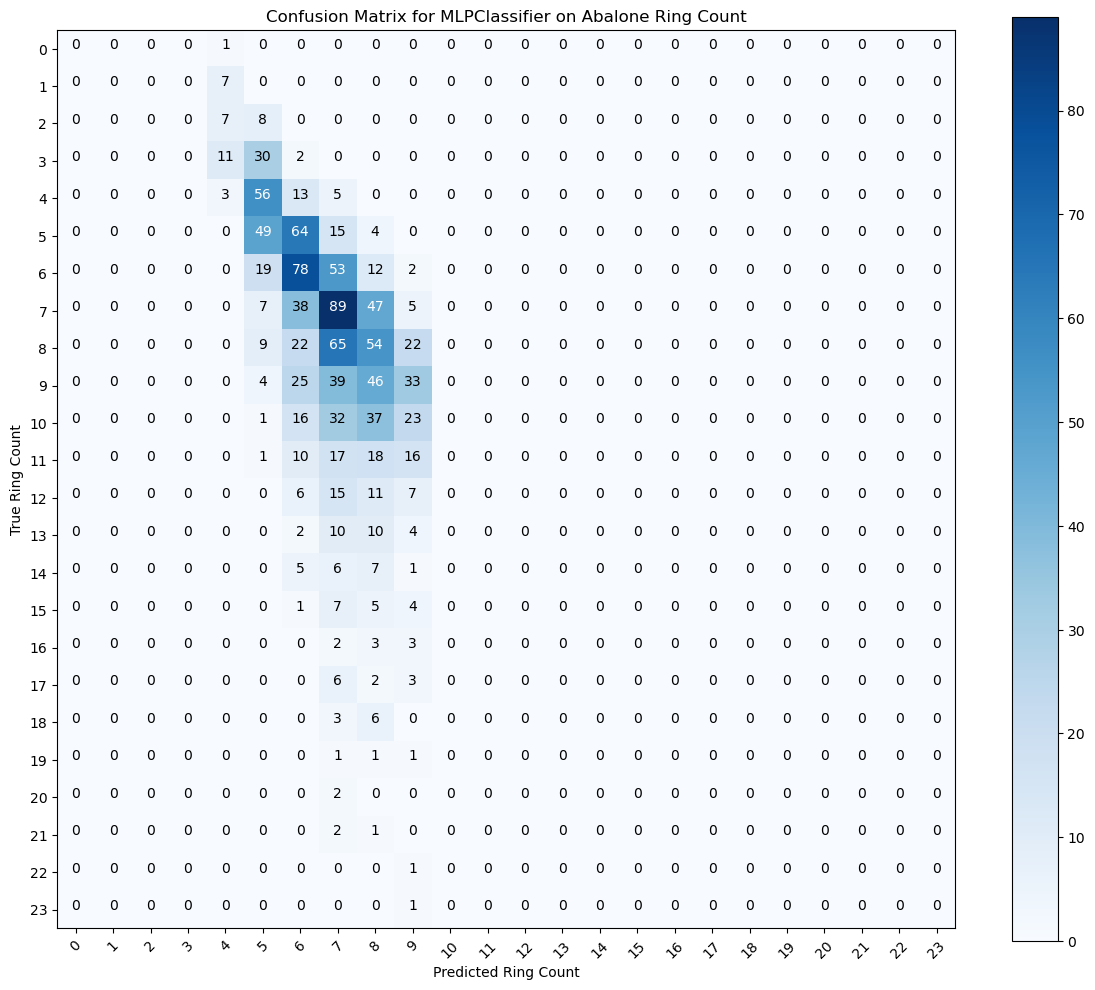

In [56]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(12, 10))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix for MLPClassifier on Abalone Ring Count')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, tick_marks, rotation=45)
plt.yticks(tick_marks, tick_marks)

# Labeling the plot
plt.xlabel('Predicted Ring Count')
plt.ylabel('True Ring Count')

# Adding the numbers inside the plot
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

# Ensure the layout is tight
plt.tight_layout()
plt.show()